# XCOBRAS - Test 01
#### eXplainable COnstraint-Based Repeated Aggregation and Splitting
###### Yacine MOKHTARI - M2 Data Science


## I. Import + Load Data

In [1]:
# ------- IMPORTS
# -- model(s)
from cobras_ts.querier.labelquerier import LabelQuerier
from xcobras_kmeans import XCOBRAS_kmeans
import shap

# -- plot(s)
from utils.plots import plot_2D, plot_boundary
import matplotlib.pyplot as plt

# -- dataset(s) 
from sklearn import datasets
from scipy.io import arff
import pandas as pd
import numpy as np

# -- others
import warnings
warnings.filterwarnings("ignore")


# ------- CREATE TOY DATASET
n_samples = 500
X_blob0, y_blob0 = datasets.make_blobs(n_samples=n_samples, centers=3, n_features=2, random_state=0)
X_blob1, y_blob1 = datasets.make_blobs(n_samples=n_samples, centers=3, n_features=2, random_state=1)
X_moons1, y_moons1 = datasets.make_moons(n_samples=n_samples, noise=0.1, random_state=1)
# on verra comment les print

# ------- READ REAL DATASET
PATH = "../../../datasets/deric benchmark/"
ARTIFICIAL = PATH+"artificial/"
REALWORLD = PATH+"real-world/"

datasets_path = [
    ARTIFICIAL+"target",
    REALWORLD+"wine",
    REALWORLD+"iris"
]

data = {}
for dataset_path in datasets_path:
    temp_data = arff.loadarff(open(dataset_path+".arff", 'r'))
    dataset_name = dataset_path.split("/")[-1]
    data[dataset_name] = pd.DataFrame(temp_data[0])
    data[dataset_name]["class"] = data[dataset_name]["class"].str.decode('utf-8') 

In [2]:
# ------- TRAIN MODEL
# clf = XCOBRAS_kmeans()
# _ = clf.fit(X, LabelQuerier(y))
# clf.predict(np.array([X[0]]))

## II. Models Training + Data Visualization

### i. First two features

XCOBRAS on the dataset: target
Size of the dataset:770
Point 1 has: 610 points and Point 2 has: 160.
Model Explainer running...
---------Some scores:---------
------------------------------
f1-score (macro): 0.9949816701
         (micro): 0.9967532468
  accuracy_score: 0.9967532468
------------------------------
... finished!
------------------------------------------


Computing the 'Shap Values'...
... finished!
------------------------------------------


Size of the dataset:770
Point 1 has: 73 points and Point 2 has: 87.
Model Explainer running...
---------Some scores:---------
------------------------------
f1-score (macro): 0.9781604257
         (micro): 0.9902597403
  accuracy_score: 0.9902597403
------------------------------
... finished!
------------------------------------------


Computing the 'Shap Values'...
... finished!
------------------------------------------


Size of the dataset:770
Point 1 has: 492 points and Point 2 has: 118.
Model Explainer running...
---------S

TypeError: plot_2D() got an unexpected keyword argument 'verbose'

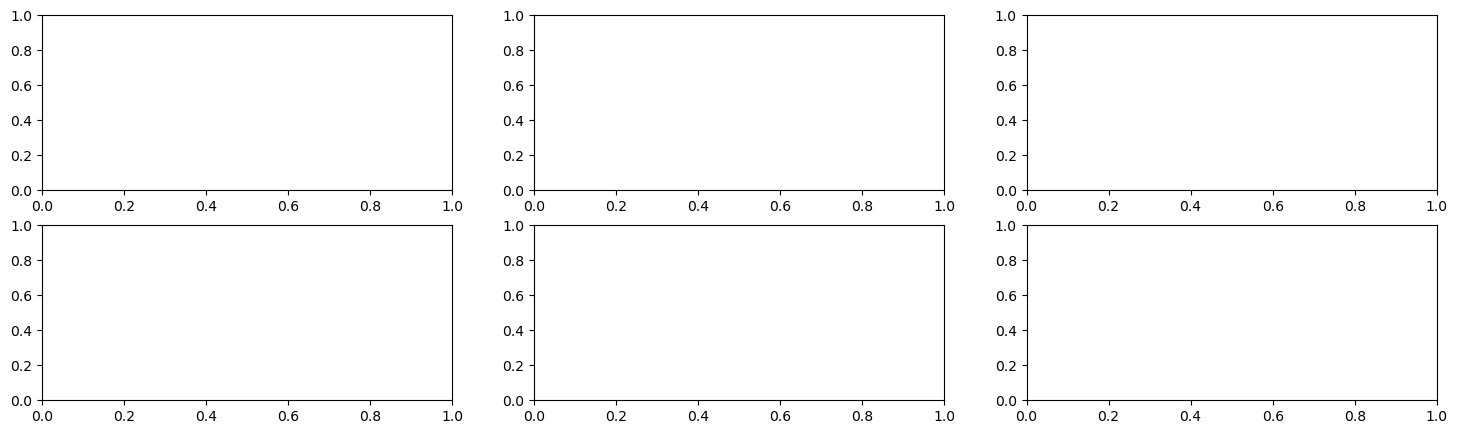

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(18,5))

for i, name in enumerate(data.keys()):
    print(f"XCOBRAS on the dataset: {name}")
    X = data[name].drop(["class"], axis=1).values
    y = data[name]["class"].values

    budget = np.max([60, X.shape[0]//5]
                    )
    xcobras_kmeans = XCOBRAS_kmeans(budget)
    _ = xcobras_kmeans.fit(X[:, :2], LabelQuerier(y))
    # axs[0]: ground truth clustering
    plot_2D(X[:, :2], y, axs[0][i], pca_t = False, title=name, verbose=False)

    # axs[1]: XCOBRAS_kmeans clustering
    plot_boundary(xcobras_kmeans, X[:, :2], axs[1][i])

    print(f"------")

### ii. First two PC (using PCA)

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18,5))

for i, name in enumerate(data.keys()):
    print(f"XCOBRAS on the dataset: {name}")
    X = data[name].drop(["class"], axis=1).values
    y = data[name]["class"].values

    budget = np.max([60, X.shape[0]//5])
    
    xcobras_kmeans = XCOBRAS_kmeans(budget)
    _ = xcobras_kmeans.fit(X[:, :2], LabelQuerier(y))
    # axs[0]: ground truth clustering
    plot_2D(X[:, :2], y, axs[0][i], title=name)

    # axs[1]: XCOBRAS_kmeans clustering
    plot_boundary(xcobras_kmeans, X[:, :2], axs[1][i])

    print(f"------")

## III. Feature Impotance - (inspired from the EXPLAIN-IT framework)

### 0. COBRAS - Example on the "**wine**" dataset

In [ ]:
X = data["wine"].drop(["class"], axis=1)
y = data["wine"]["class"]
feature_names = list(X.columns)

budget = 160

xcobras_kmeans = XCOBRAS_kmeans(budget)
xcobras_kmeans.fit(X.values, LabelQuerier(y.values))
y_hat = xcobras_kmeans.predict(X.values)

In [ ]:
set(y_hat)

Variables:
*  `X`: dataset (Wine)
*  `y`: ground truth
*  `y_hat`: XCOBRAS_kmeans' prediction

### i. Train a supervised learning model on the output of COBRAS
[Pipeline + GridSearchCV reference](https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html)


Two supervised models will be used:
* Support Vector Machine ([SVC from `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))
* Multi-Layer Perceptron - p-e ... 

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import train_test_split, HalvingGridSearchCV, GridSearchCV
from sklearn.svm import SVC
# import 2e modèle

# ----- dataset split (X and y_hat)
X_train, X_test, y_hat_train, y_hat_test = train_test_split(
        X, y_hat, test_size=0.4, random_state=42
    )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train.values, y_hat_train)
score = model.score(X_test.values, y_hat_test)
score # le score nul est voulu

Cross-validation are used while computing the "f1-score" ?

In [ ]:
# ----- Cross-Validation on the TRAIN set
# ----- Model training
# RBF Model
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

In [ ]:
# ----- HalvingGridSearch on the TEST set
# ----- Hyperparameters fine tuning

# To make the cross validation
gammas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
Cs = [1, 10, 100, 1e3, 1e4, 1e5]
param_grid = {
    "svm_clf__gamma": gammas, 
    "svm_clf__C": Cs
    }

# HalvingGridSearchCV
grid_search_halving = GridSearchCV(
    estimator=rbf_kernel_svm_clf, 
    param_grid=param_grid, 
    # factor=2, # only half of the candidates are selected
    cv=2 # default value
    )

# Fitting this model
grid_search_halving.fit(X_train.values,y_hat_train)

In [ ]:
# pd.DataFrame(grid_search_halving.cv_results_).head(3)
grid_search_halving.best_params_

> Showing the f1-score `'macro'`*:
>   *  ``'macro'``: Calculate metrics for each label, and find their unweighted mean.  This does not take label imbalance into account.

In [ ]:
best_svm_clf = grid_search_halving.best_estimator_
y_test_pred = best_svm_clf.predict(X_test.values)

print(f"f1-score (macro): {f1_score(y_hat_test, y_test_pred, average='macro')}")
print(f"         (micro): {f1_score(y_hat_test, y_test_pred, average='micro')}")
print(f"accuracy_score:   {accuracy_score(y_hat_test, y_test_pred)}")

### ii. SHAP
#### Apply on both `XCOBRAS_kmeans` and `RBF SVM` models
> **Note:** We are giving the whole dataset to XCOBRAS_kmeans, but only the training

**General idea:**  
1. Get all the instances of a certain cluster
2. Explain the whole cluster
3. Show explanation of 2 samples

In [ ]:
label = np.random.choice(list(set(y_hat)))
print(f"Chosen label: {label}")
X_label = X[list(y_hat)==label]
print(f"Number of instances: {X_label.shape[0]}")
# instance0, instance1 = X_label[0].values, X_label[1].values
# X_label

#  ---- COBRAS
explainer_XCOBRAS_kmeans = shap.Explainer(
    xcobras_kmeans.predict,
    X_label.values,
    feature_names=list(X.columns)
)
print("XCOBRAS explainer .... ")
XCOBRAS_shap_values = explainer_XCOBRAS_kmeans(X_label.values)


#  ---- SVM
explainer_SVM_clf = shap.Explainer(
    best_svm_clf.predict,
    X_label.values,
    feature_names=list(X.columns)
)
print("SVM_clf explainer .... ")
SVM_clf_shap_values = explainer_SVM_clf(X_label)

#  ---- LogisticRegression
explainer_log_reg = shap.Explainer(
    model.predict,
    X_label.values,
    feature_names=list(X.columns)
)
print("log_reg explainer .... ")
log_reg_shap_values = explainer_log_reg(X_label)


In [ ]:
X_label

In [ ]:
# If we look at the two first explanations
# shap.plots.waterfall(XCOBRAS_shap_values[0])
# plt.text(0.5, 0.5, 'Some text', transform=plt.transAxes)

In [ ]:
shap.summary_plot(SVM_clf_shap_values, 
                  X_label.values,
                  cmap = "plasma")

In [ ]:
shap.plots.bar(log_reg_shap_values)

In [ ]:
shap.plots.bar(SVM_clf_shap_values)

In [ ]:
shap.plots.bar(XCOBRAS_shap_values)

In [ ]:
shap.plots.bar(XCOBRAS_shap_values[19])

> ##### Observations
> * ....


### iii. LIME

In [ ]:
# TODO